In [1]:
import sys
sys.path.append('..')
from DE import DE
from objective_functions import MSE
from data import create_3d_gauss_data
from data import create_simple_data
from visualizer import plot_2d_gauss, plot_simple_data

# Neural Network DE

In [ ]:
Xtrain, ytrain, Xtest, ytest = create_simple_data('parabola', 100, noise=True)

D = DE(objective_function=MSE, sizes=[1,3,1], pop_size=50, F=0.55, cr=0.85, 
        X=Xtrain, y=ytrain, Xtest=Xtest, ytest=ytest, type='regression')

#best_agent, opt_agent = D.early_stop_training(patience=1000)
best_agent = D.evolution(num_epochs=1201, verbose=True, print_epoch=100)
D.evaluate(plot_function=plot_simple_data, title=r'Fit of $y = x^2$')

In [ ]:
D.evaluate(plot_function=plot_simple_data, title=r'Fit of $y = x^2$', savefig=False)

In [ ]:
%%timeit -o -r 1
D.evolution(num_epochs=1)

# Classic DE

In [2]:
from DE_old import DE as DEO
from objective_functions import paraboloid, ackley
from visualizer import plot_ackley

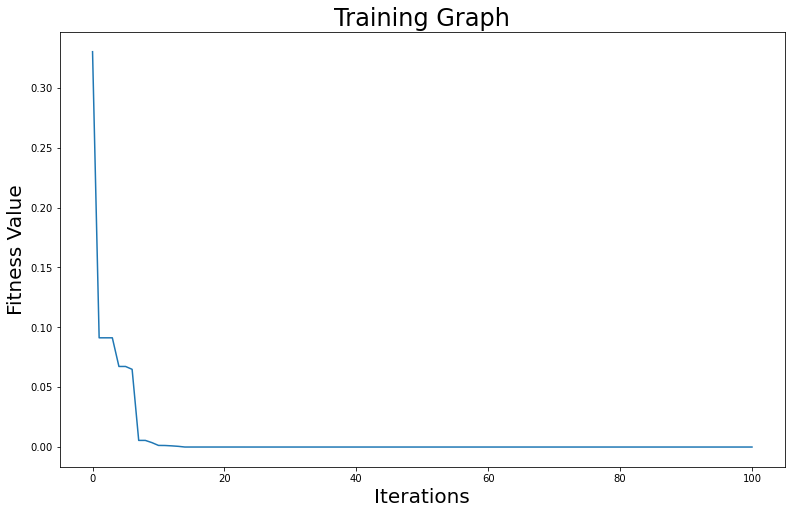

Worst initialization was [4.24 4.84] with a cost of         41.43.
Best agent is [-1.64e-12  4.62e-13] with a cost of               2.9092560000000004e-24.


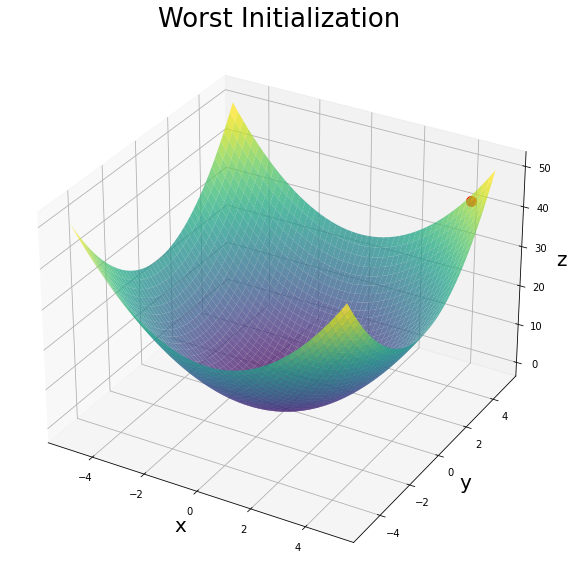

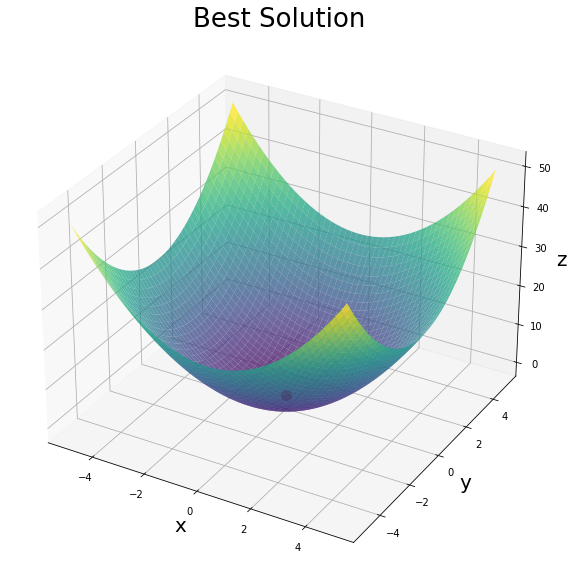

In [5]:
D = DEO(objective_function=paraboloid, bounds=[-5, 5], pop_size=50, num_dimensions=2, F=0.55, cr=0.85)
D.evolution(num_epochs=100)
D.evaluate(plot_function=plot_ackley, bounds=[-5, 5])